# Data Cleaning Strategy

**Raw Data** *(csv)*
- Fix column names
- Description for each column
- Convert data types as needed
- Recode missing values
- Split/combine columns as needed (ex: Date and Time could be in separate fields)

**Clean Data** *(pandas df)*
- Null count per column
- "use" for each column (what its purpose is in the analysis)
- look at unique values (ex: Neighborhoods)

**Preliminary Analysis**
- Datetime field investigation
    - overall histogram
    - histogram of appointments per day of week
- Counts for any fields used for categorization/grouping

## Raw Data Processing/Cleaning

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# raw data filename
data_file = '../data/raw/KaggleV2-May-2016.csv'

In [3]:
df_raw = pd.read_csv(data_file)

In [4]:
# Basic dataframe info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Notes from above output:**
- All fields appear to have no null values.
- PatientId is type float64, but AppointmentID is type int64
- Date(time?) fields: (need to convert)
    - ScheduledDay
    - AppointmentDay
- Rename:
    - 'PatientId' --> 'Patient_ID'
    - 'AppointmentID' --> 'Appointment_ID'
    - 'ScheduledDay' --> 'Scheduled_Date'
    - 'AppointmentDay' --> 'Appointment_Date'
    - 'Neighbourhood' --> 'Neighborhood'
    - 'Scholarship' --> 'Welfare' (see note in reference https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
    - 'Hipertension' --> 'Hypertension'
    - 'Handcap' --> 'Disability'
    - 'SMS_received' --> 'SMS_sent'
    - 'No-show' --> 'No_show'

In [5]:
df_raw.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df_raw.columns = ['Patient_ID',
                  'Appointment_ID',
                  'Gender',
                  'Scheduled_Date',
                  'Appointment_Date',
                  'Age',
                  'Neighborhood',
                  'Welfare',
                  'Hypertension',
                  'Diabetes',
                  'Alcoholism',
                  'Disability',
                  'SMS_sent',
                  'No_show']

In [7]:
# Describe
df_raw.describe()

,Patient_ID,Appointment_ID,Age,Welfare,Hypertension,Diabetes,Alcoholism,Disability,SMS_sent
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df_raw['Scheduled_Date']

0         2016-04-29T18:38:08Z
1         2016-04-29T16:08:27Z
2         2016-04-29T16:19:04Z
3         2016-04-29T17:29:31Z
4         2016-04-29T16:07:23Z
5         2016-04-27T08:36:51Z
6         2016-04-27T15:05:12Z
7         2016-04-27T15:39:58Z
8         2016-04-29T08:02:16Z
9         2016-04-27T12:48:25Z
10        2016-04-27T14:58:11Z
11        2016-04-26T08:44:12Z
12        2016-04-28T11:33:51Z
13        2016-04-28T14:52:07Z
14        2016-04-28T10:06:24Z
15        2016-04-26T08:47:27Z
16        2016-04-28T08:51:47Z
17        2016-04-28T09:28:57Z
18        2016-04-26T10:54:18Z
19        2016-04-29T10:43:14Z
20        2016-04-27T07:51:14Z
21        2016-04-27T10:50:45Z
22        2016-04-25T13:29:16Z
23        2016-04-28T10:27:05Z
24        2016-04-29T14:19:19Z
25        2016-04-26T15:04:17Z
26        2016-04-29T14:19:42Z
27        2016-04-27T10:51:45Z
28        2016-04-29T15:48:02Z
29        2016-04-29T15:16:29Z
                  ...         
110497    2016-06-01T09:46:33Z
110498  

In [9]:
pd.to_datetime(df_raw['Scheduled_Date'])

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
5        2016-04-27 08:36:51
6        2016-04-27 15:05:12
7        2016-04-27 15:39:58
8        2016-04-29 08:02:16
9        2016-04-27 12:48:25
10       2016-04-27 14:58:11
11       2016-04-26 08:44:12
12       2016-04-28 11:33:51
13       2016-04-28 14:52:07
14       2016-04-28 10:06:24
15       2016-04-26 08:47:27
16       2016-04-28 08:51:47
17       2016-04-28 09:28:57
18       2016-04-26 10:54:18
19       2016-04-29 10:43:14
20       2016-04-27 07:51:14
21       2016-04-27 10:50:45
22       2016-04-25 13:29:16
23       2016-04-28 10:27:05
24       2016-04-29 14:19:19
25       2016-04-26 15:04:17
26       2016-04-29 14:19:42
27       2016-04-27 10:51:45
28       2016-04-29 15:48:02
29       2016-04-29 15:16:29
                 ...        
110497   2016-06-01 09:46:33
110498   2016-06-08 10:21:14
110499   2016-06-01 09:42:56
110500   2016-

In [10]:
df_raw['Scheduled_Date'] = pd.to_datetime(df_raw['Scheduled_Date'])

In [11]:
df_raw['Appointment_Date']

0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
5         2016-04-29T00:00:00Z
6         2016-04-29T00:00:00Z
7         2016-04-29T00:00:00Z
8         2016-04-29T00:00:00Z
9         2016-04-29T00:00:00Z
10        2016-04-29T00:00:00Z
11        2016-04-29T00:00:00Z
12        2016-04-29T00:00:00Z
13        2016-04-29T00:00:00Z
14        2016-04-29T00:00:00Z
15        2016-04-29T00:00:00Z
16        2016-04-29T00:00:00Z
17        2016-04-29T00:00:00Z
18        2016-04-29T00:00:00Z
19        2016-04-29T00:00:00Z
20        2016-04-29T00:00:00Z
21        2016-04-29T00:00:00Z
22        2016-04-29T00:00:00Z
23        2016-04-29T00:00:00Z
24        2016-04-29T00:00:00Z
25        2016-04-29T00:00:00Z
26        2016-04-29T00:00:00Z
27        2016-04-29T00:00:00Z
28        2016-04-29T00:00:00Z
29        2016-04-29T00:00:00Z
                  ...         
110497    2016-06-01T00:00:00Z
110498  

In [12]:
pd.to_datetime(df_raw['Appointment_Date'])

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
5        2016-04-29
6        2016-04-29
7        2016-04-29
8        2016-04-29
9        2016-04-29
10       2016-04-29
11       2016-04-29
12       2016-04-29
13       2016-04-29
14       2016-04-29
15       2016-04-29
16       2016-04-29
17       2016-04-29
18       2016-04-29
19       2016-04-29
20       2016-04-29
21       2016-04-29
22       2016-04-29
23       2016-04-29
24       2016-04-29
25       2016-04-29
26       2016-04-29
27       2016-04-29
28       2016-04-29
29       2016-04-29
            ...    
110497   2016-06-01
110498   2016-06-08
110499   2016-06-01
110500   2016-06-08
110501   2016-06-01
110502   2016-06-08
110503   2016-06-01
110504   2016-06-08
110505   2016-06-01
110506   2016-06-01
110507   2016-06-08
110508   2016-06-01
110509   2016-06-08
110510   2016-06-01
110511   2016-06-08
110512   2016-06-08
110513   2016-06-08
110514   2016-06-08
110515   2016-06-08


In [13]:
df_raw['Appointment_Date'] = pd.to_datetime(df_raw['Appointment_Date'])

In [14]:
df_raw.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Date,Appointment_Date,Age,Neighborhood,Welfare,Hypertension,Diabetes,Alcoholism,Disability,SMS_sent,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
df_raw['Patient_ID'].value_counts()

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

In [16]:
df_raw['Appointment_ID'].value_counts().max()

1

**Appointment_ID is unique ID**

In [17]:
df_raw.columns

Index(['Patient_ID', 'Appointment_ID', 'Gender', 'Scheduled_Date',
       'Appointment_Date', 'Age', 'Neighborhood', 'Welfare', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Disability', 'SMS_sent', 'No_show'],
      dtype='object')

In [18]:
df_raw.describe()

,Patient_ID,Appointment_ID,Age,Welfare,Hypertension,Diabetes,Alcoholism,Disability,SMS_sent
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Notes from `describe` above**

- Age ranges from -1 to 115 (plot this)
- Welfare, Hypertension, Diabetes, Alcoholism, and SMS_sent seem ok
- Disability has a max of 4 (thought this was supposed to be binary...)

Next steps:
- Plot Age distribution
- Histograms for Date columns
- Unique values/counts for:
    - Gender
    - Neighborhood
    - Disability
    - No_show

In [19]:
df_raw.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [20]:
df_raw.Neighborhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO                  1836
REDENÇÃO                    

In [21]:
df_raw.Disability.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Disability, dtype: int64

In [22]:
df_raw.No_show.value_counts()

No     88208
Yes    22319
Name: No_show, dtype: int64

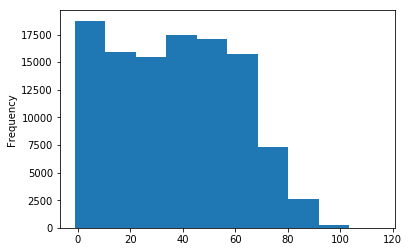

In [23]:
# Age distribution
# FIXME: This is currently double counting (or 88x counting) people because patients appear multiple times in the data...
df_raw.Age.plot(kind='hist')
plt.show()

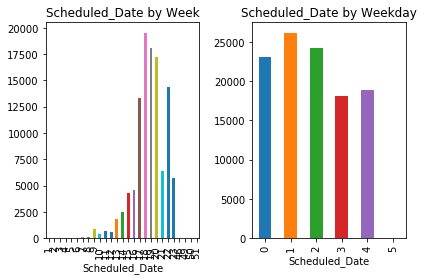

In [24]:
# Scheduled_Date Histogram
plt.subplot(1, 2, 1)
df_raw.Scheduled_Date.groupby(df_raw['Scheduled_Date'].dt.week).count().plot(kind='bar', title='Scheduled_Date by Week')

plt.subplot(1, 2, 2)
df_raw.Scheduled_Date.groupby(df_raw['Scheduled_Date'].dt.weekday).count().plot(kind='bar', title='Scheduled_Date by Weekday')
plt.tight_layout()

plt.show()


# ugly....

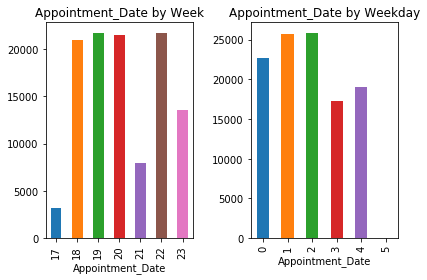

In [25]:
# Appointment_Date Histogram
# Scheduled_Date Histogram
plt.subplot(1, 2, 1)
df_raw.Appointment_Date.groupby(df_raw['Appointment_Date'].dt.week).count().plot(kind='bar', title='Appointment_Date by Week')

plt.subplot(1, 2, 2)
df_raw.Appointment_Date.groupby(df_raw['Appointment_Date'].dt.weekday).count().plot(kind='bar', title='Appointment_Date by Weekday')
plt.tight_layout()

plt.show()


# ugly....

In [26]:
df_clean = df_raw.copy()

In [27]:
df_clean.Scheduled_Date.min()

Timestamp('2015-11-10 07:13:56')

In [28]:
df_clean.Scheduled_Date.max()

Timestamp('2016-06-08 20:07:23')

In [29]:
# Set index to 'Appointment_ID' (unique, unlike Patient_ID)
df_clean.set_index('Appointment_ID')

,Patient_ID,Gender,Scheduled_Date,Appointment_Date,Age,Neighborhood,Welfare,Hypertension,Diabetes,Alcoholism,Disability,SMS_sent,No_show
Appointment_ID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5626772,9.598513e+13,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
5630279,7.336882e+14,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
5630575,3.449833e+12,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5638447,5.639473e+13,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No


In [30]:
ages = df_clean.groupby('Patient_ID', sort=False)['Age'].max()

In [31]:
from collections import Counter

age_count = Counter()
for age in ages:
    age_count[age] += 1
    
age_count

Counter({-1: 1,
         0: 2028,
         1: 1476,
         2: 1081,
         3: 955,
         4: 840,
         5: 915,
         6: 874,
         7: 829,
         8: 839,
         9: 745,
         10: 727,
         11: 703,
         12: 650,
         13: 662,
         14: 622,
         15: 679,
         16: 790,
         17: 831,
         18: 848,
         19: 901,
         20: 803,
         21: 822,
         22: 768,
         23: 734,
         24: 717,
         25: 743,
         26: 714,
         27: 759,
         28: 782,
         29: 766,
         30: 812,
         31: 791,
         32: 812,
         33: 820,
         34: 847,
         35: 733,
         36: 843,
         37: 815,
         38: 848,
         39: 829,
         40: 767,
         41: 753,
         42: 673,
         43: 718,
         44: 765,
         45: 758,
         46: 765,
         47: 811,
         48: 793,
         49: 847,
         50: 883,
         51: 885,
         52: 916,
         53: 884,
         54: 841,
 

Cell above shows age distribution, looks like there are plenty of newborns. That seems reasonable, but the -1 is obviously impossible and the 115 is highly unlikely.

In [32]:
# Export list of neighborhoods to search for a reference list online
# https://pt.wikipedia.org/wiki/Lista_de_bairros_de_Vitória_(Espírito_Santo)

nhood_file = '../data/interim/nhoods.txt'

nhood_list = list(df_clean['Neighborhood'].unique())

nhood_list_b = [x.encode('utf8') for x in nhood_list]

with open(nhood_file, 'wb') as f:
     for line in nhood_list_b:
            f.write(line)


In [33]:
for line in nhood_list:
    print(line)

JARDIM DA PENHA
MATA DA PRAIA
PONTAL DE CAMBURI
REPÚBLICA
GOIABEIRAS
ANDORINHAS
CONQUISTA
NOVA PALESTINA
DA PENHA
TABUAZEIRO
BENTO FERREIRA
SÃO PEDRO
SANTA MARTHA
SÃO CRISTÓVÃO
MARUÍPE
GRANDE VITÓRIA
SÃO BENEDITO
ILHA DAS CAIEIRAS
SANTO ANDRÉ
SOLON BORGES
BONFIM
JARDIM CAMBURI
MARIA ORTIZ
JABOUR
ANTÔNIO HONÓRIO
RESISTÊNCIA
ILHA DE SANTA MARIA
JUCUTUQUARA
MONTE BELO
MÁRIO CYPRESTE
SANTO ANTÔNIO
BELA VISTA
PRAIA DO SUÁ
SANTA HELENA
ITARARÉ
INHANGUETÁ
UNIVERSITÁRIO
SÃO JOSÉ
REDENÇÃO
SANTA CLARA
CENTRO
PARQUE MOSCOSO
DO MOSCOSO
SANTOS DUMONT
CARATOÍRA
ARIOVALDO FAVALESSA
ILHA DO FRADE
GURIGICA
JOANA D´ARC
CONSOLAÇÃO
PRAIA DO CANTO
BOA VISTA
MORADA DE CAMBURI
SANTA LUÍZA
SANTA LÚCIA
BARRO VERMELHO
ESTRELINHA
FORTE SÃO JOÃO
FONTE GRANDE
ENSEADA DO SUÁ
SANTOS REIS
PIEDADE
JESUS DE NAZARETH
SANTA TEREZA
CRUZAMENTO
ILHA DO PRÍNCIPE
ROMÃO
COMDUSA
SANTA CECÍLIA
VILA RUBIM
DE LOURDES
DO QUADRO
DO CABRAL
HORTO
SEGURANÇA DO LAR
ILHA DO BOI
FRADINHOS
NAZARETH
AEROPORTO
ILHAS OCEÂNICAS DE TRINDADE
PAR

In [60]:
nhood_ByteArray = bytearray(nhood_list_b)

TypeError: an integer is required

## Clean Dataset - EDA